In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [ ]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [ ]:
job2419 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2419.pkl")
job2420 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2420.pkl")
job2426 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2426.pkl")
job2458 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2458.pkl")
job2459 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2459.pkl")
job2720 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2720.pkl")
job2899 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2899.pkl")
job2930 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2930.pkl")
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.pkl")
job2942_0_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.gen.pkl")
expDvcsInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_inb.pkl")
expDvcsOutb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_outb.pkl")

In [ ]:
def drawKine(sim1, sim2, exp=None, save = None):
    varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
    title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$"]
    unit = [GeV, GeV, GeVc2, None, GeV2, degree]
    binstarts = [2, 2, 1, 0, 0, 0]
    binends = [9, 4, 10, 1, 1.7, 360]
    fig, axs = plt.subplots(2, 3, figsize = (15, 10))
    for xind in range(0,3):
        for yind in range(0, 2):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    axs[0, 0].set_xticks([2, 4, 6, 8, 9])
    axs[0, 2].set_xticks([1, 4, 7, 10])
    axs[1, 1].set_xticks([0, 1, 1.7])
    axs[1, 2].set_xticks(np.linspace(0, 360, 7))
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [ ]:
def drawExcl(sim1, sim2, exp=None, save = None):
    varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
    title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
    unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
    binstarts = [20, 0, 0, -0.5, -0.025, 0.1,-0.25 , 0]
    binends = [50, 2.5, 20, 1.5, 0.025, 1.7, 0.25, 0.25]
    fig, axs = plt.subplots(2, 4, figsize = (15,10))
    for yind in range(0, 2):
        for xind in range(0,4):
            ind = 4*yind + xind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 101)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            axs[yind, xind].set_xlim([start, end])
    axs[0, 0].set_xticks([20, 35, 50])
    axs[0, 1].set_xticks([0, 1.25, 2.5])
    axs[0, 3].set_xticks([-0.5, 0, 0.5, 1, 1.5])
    axs[1, 1].set_xticks([0.1, 1, 1.7])
    axs[1, 3].set_xticks([0, 0.125, 0.25])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [ ]:
def drawVertex(sim1, sim2, exp=None, save = None):
    varstoplot = ["Evx", "Evy", "Evz", "Etheta", "Ptheta", "Gtheta", "Ephi", "Gphi", "Gphi"]
    title = [r"$vx_{e'}$", r"$vy_{e'}$", r"$vz_{e'}$", r"$\theta_{e'}$", r"$\theta_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{e'}$", r"$\phi_{p'}$", r"$\phi_{\gamma}$" ]
    unit = ["cm", "cm", "cm", degree, degree, degree, degree, degree, degree]
    binstarts = [-0.2, -1, -6, 0, 0, 0, -180, -180, -180]
    binends = [0.2, 1, 0, 45, 45, 45, 180, 180, 180]
    fig, axs = plt.subplots(3, 3, figsize = (15,15))
    for xind in range(0,3):
        for yind in range(0, 3):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    for i in range(3):
        axs[1, i].set_xticks([0, 15, 30, 45])
    for i in range(3):
        axs[2, i].set_xticks(np.linspace(-180, 180, 5))
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [ ]:
def drawCartesian(sim1, sim2, exp=None, save = None):
    varstoplot = ["Epx", "Ppx", "Gpx", "Epy", "Ppy", "Gpy", "Epz", "Ppz", "Gpz", "Ep", "Pp", "Gp"]
    title = [r"$px_{e'}$", r"$px_{p'}$", r"$px_{\gamma}$", r"$py_{e'}$", r"$py_{p'}$", r"$py_{\gamma}$", r"$pz_{e'}$", r"$pz_{p'}$", r"$pz_{\gamma}$", r"$p_{e'}$", r"$p_{p'}$", "$p_{\gamma}$"]
    unit = [GeVc, GeVc, GeVc2, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
    binstarts = [-2, -2, -2, -2, -2, -2, 0, -2, 0, 0, 0, 0]
    binends = [2, 2, 2, 2, 2, 2, 10, 3, 10, 10, 3, 10]
    fig, axs = plt.subplots(4, 3, figsize = (15,20))
    for xind in range(0,3):
        for yind in range(0, 4):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [39]:
expInb1 = expDvcsInb[expDvcsInb.RunNum<5278]
expInb2 = expDvcsInb[expDvcsInb.RunNum>5277]
expInb1.loc[:, "Evx"] = expInb1.loc[:, "Evx"] - 0.0031
expInb1.loc[:, "Evy"] = expInb1.loc[:, "Evy"] - (-0.0041)
expInb2.loc[:, "Evx"] = expInb2.loc[:, "Evx"] - 0.035
expInb2.loc[:, "Evy"] = expInb2.loc[:, "Evy"] - (-0.1)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [40]:
drawKine(job2419, job2420, save="24192420_1.pdf")

<Figure size 1080x720 with 0 Axes>

In [41]:
drawExcl(job2419, job2420, save="24192420_2.pdf")

<Figure size 1080x720 with 0 Axes>

In [42]:
drawKine(job2420[job2420.t2<1], job2426[job2426.t2<1], exp=expDvcsInb[expDvcsInb.t2<1], save = "24202426.pdf")

<Figure size 1080x720 with 0 Axes>

In [43]:
drawKine(job2942_0, expInb1, save = "2942exp1.pdf")

<Figure size 1080x720 with 0 Axes>

In [44]:
drawExcl(job2942_0, expInb1, save = "2942exp2.pdf")

<Figure size 1080x720 with 0 Axes>

In [45]:
drawVertex(job2942_0, expInb1, save = "2942exp3.pdf")

<Figure size 1080x1080 with 0 Axes>

In [46]:
drawCartesian(job2942_0, expDvcsInb, save = "2942exp4.pdf")

<Figure size 1080x1440 with 0 Axes>

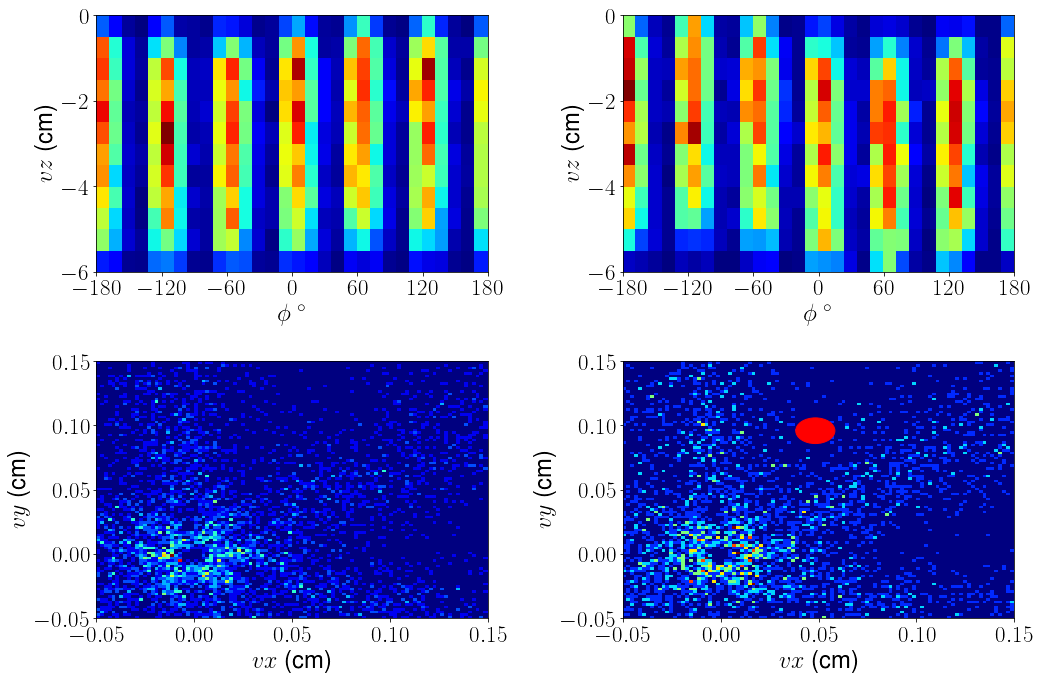

In [12]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
binx = np.linspace(-180, 180, 31)
biny = np.linspace(-6, 0, 13)
ax[0,0].hist2d(job2458.Ephi, job2458.Evz, cmap=cmap, bins =[binx, biny])
ax[0,0].set_xlabel(r"$\phi$ "+degree)
ax[0,0].set_xticks(np.linspace(-180, 180, 7))
ax[0,0].set_ylabel(r"$vz$ "+"(cm)")
ax[0,1].hist2d(job2459.Ephi, job2459.Evz, cmap=cmap, bins =[binx, biny])
ax[0,1].set_xlabel(r"$\phi$ "+degree)
ax[0,1].set_xticks(np.linspace(-180, 180, 7))
ax[0,1].set_ylabel(r"$vz$ "+"(cm)")
binx = np.linspace(-0.05, 0.15, 101)
biny = np.linspace(-0.05, 0.15, 101)
ax[1,0].hist2d(job2458.Evx, job2458.Evy, cmap=cmap, bins =[binx, biny])
ax[1,0].set_xlabel(r"$vx$ "+"(cm)")
ax[1,0].set_ylabel(r"$vy$ "+"(cm)")
ax[1,1].hist2d(job2459.Evx, job2459.Evy, cmap=cmap, bins =[binx, biny])
circle1 = plt.Circle((0.0483278, 0.0958866), 0.01, color='r')
ax[1,1].add_patch(circle1)
ax[1,1].set_xlabel(r"$vx$ "+"(cm)")
ax[1,1].set_ylabel(r"$vy$ "+"(cm)")
plt.tight_layout()
plt.savefig("24582459.pdf")

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (25, 10))
job2942_0.GenEvz.hist(bins = np.linspace(-5.5,-0.5,5001), ax=ax[1])
ax[1].set_xlabel("job 2942, generated vz (cm)")
job2899.GenEvz.hist(bins = np.linspace(-5.5,-0.5,5001), ax=ax[0])
ax[0].set_xlabel("job 2899, generated vz (cm)")
plt.savefig("28992942.pdf")

In [141]:
sim = job2930
VGS = [-sim.GenEpx, -sim.GenEpy, pbeam - sim.GenEpz]
ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
GenEe = getEnergy(ele, 0.0005)
GenPe = getEnergy(pro, 0.9383)
GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
GenNu = (ebeam - GenEe)
GenY = GenNu/ebeam
GenxB = GenQ2 / 2.0 / M / GenNu
GenT = 2 * M * (GenPe - M)
v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
GenPhi = angle(v3l, v3h)
GenPhi = GenPhi*0 + np.where(dot(VGS, cross(v3l, pro)) > 0, 360.0 - GenPhi, GenPhi)

GenW = np.sqrt(np.maximum(0, M*M + 2*M*GenNu-GenQ2))

In [148]:
print(GenW.min())

1.931016247660374


<AxesSubplot:>

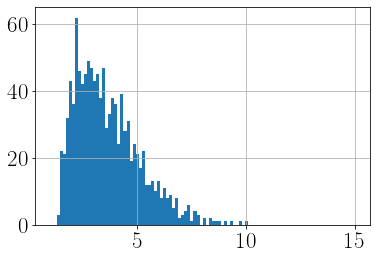

In [150]:
GenQ2.hist(bins = np.linspace(1, 15, 101))

<AxesSubplot:>

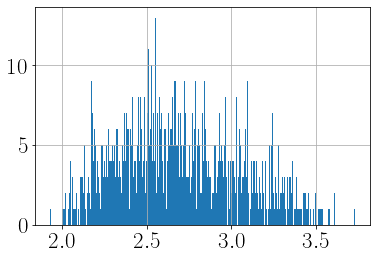

In [149]:
GenW.hist(bins = 361)

<AxesSubplot:>

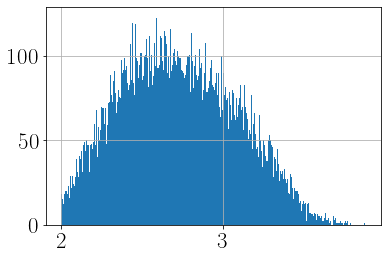

In [139]:
sim.W.hist(bins=361)

<AxesSubplot:>

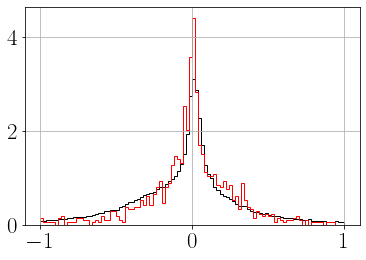

In [102]:
expDvcsInb.Evx.hist(density=True, bins =np.linspace(-1, 1, 101), histtype = "stepfilled", facecolor='none', edgecolor='k')
sim.Evx.hist(density=True, bins =np.linspace(-1, 1, 101), histtype = "stepfilled", facecolor='none', edgecolor='r')

In [67]:
expDvcsInb.columns

Index(['Epx', 'Epy', 'Epz', 'Evx', 'Evy', 'Evz', 'Esector', 'event', 'Ppx',
       'Ppy', 'Ppz', 'Pvz', 'Psector', 'Pp', 'Ptheta', 'Pphi', 'Pe', 'Gpx',
       'Gpy', 'Gpz', 'Gsector', 'GIndex', 'Ep', 'Ee', 'Etheta', 'Ephi', 'Gp',
       'Ge', 'Gtheta', 'Gphi', 'Mpx', 'Mpy', 'Mpz', 'Q2', 'nu', 'y', 'xB',
       't1', 't2', 'W', 'phi1', 'phi2', 'MM2_epg', 'ME_epg', 'MM2_ep',
       'MM2_eg', 'MPt', 'coneAngle', 'reconGam', 'coplanarity'],
      dtype='object')

In [150]:
VGS = [-job2420.Epx, -job2420.Epx, pbeam - job2420.Epz]
GenQ2 = -((ebeam - job2420.Ee)**2 - mag2(VGS))

In [157]:
GenQ2[GenQ2.duplicated()]

Series([], dtype: float64)

In [187]:
job2899.loc[job2899.GenEpx==-0.46970000863075256, ["event", "GenEpx", "GenEpy", "GenEpz", "GenEvz"]]

,event,GenEpx,GenEpy,GenEpz,GenEvz
0,3,-0.4697,-1.2258,6.4355,-2.5379
244,567,-0.4697,-1.2258,6.4355,-2.5379
1636,3504,-0.4697,-1.2258,6.4355,-2.5379
2214,4741,-0.4697,-1.2258,6.4355,-2.5379
2597,5556,-0.4697,-1.2258,6.4355,-2.5379
...,...,...,...,...,...
24519,51894,-0.4697,-1.2258,6.4355,-2.5379
24529,51920,-0.4697,-1.2258,6.4355,-2.5379
25149,53217,-0.4697,-1.2258,6.4355,-2.5379
25800,54634,-0.4697,-1.2258,6.4355,-2.5379


In [180]:
job2899.GenEpx[0]

-0.46970000863075256

<AxesSubplot:>

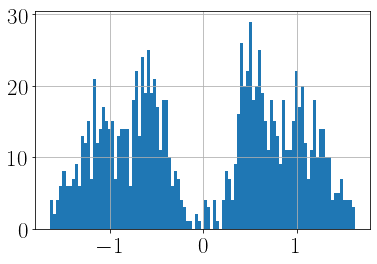

In [31]:
job2930.GenEpx.hist(bins = 101)

In [16]:
len(job2420)

16087

In [17]:
len(job2930)

905

<AxesSubplot:>

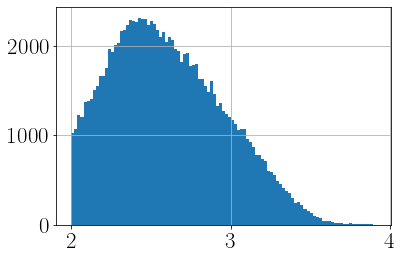

In [19]:
expDvcsInb.W.hist(bins = 101)

<AxesSubplot:>

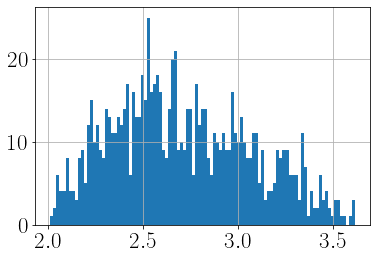

In [20]:
job2930.W.hist(bins= 101)

In [159]:
expDvcsOutb.xB.min()

0.06400749956339982

In [63]:
len(expDvcsInb[expDvcsInb.t2<1.5])/len(expDvcsInb)

0.8362911212826896

In [62]:
len(expDvcsOutb[expDvcsOutb.t2<1.5])/len(expDvcsOutb)

0.7774023252947702

In [22]:
len(job2942_0)

9617

In [23]:
len(job2458)

19565

In [24]:
len(expDvcsInb)

112077

In [ ]:
minVal = []
maxVal = []
for i in ["xB", "Q2", "t2", "y"]:
#     print("\makecell{" + "{:.3f}".format(expDvcsInb[i].min()) + "\\\\ {:.3f}".format(expDvcsInb[i].max()) + "} &", end='')
    print("\makecell{" + "{:.3f}".format(expDvcsOutb[i].min()) + "\\\\ {:.3f}".format(expDvcsOutb[i].max()) + "} &", end='')
    
#     minVal.append("{:.3f}".format(expDvcsInb[i].min()))
#     maxVal.append("{:.3f}".format(expDvcsInb[i].max()))
    
# minVal = np.array(minVal)
# maxVal = np.array(maxVal)
# print(np.vstack([minVal, maxVal]))

In [ ]:
len(job2942_0)+len(job2942_1)+ len(job2942_2) + len(job2942_3) + len(job2942_4)+len(job2942_5)+ len(job2942_6) + len(job2942_7) + len(job2942_8)+len(job2942_9)

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15,10))
ax[0,0].hist(-(job2419.GenEpx + job2419.GenPpx + job2419.GenGpx), bins = np.linspace(-0.1, 0.1, 10))
ax[1,0].hist(-(job2420.GenEpx + job2420.GenPpx + job2420.GenGpx), bins = np.linspace(-0.1, 0.1, 10))
ax[0,1].hist(-(job2419.GenEpy + job2419.GenPpy + job2419.GenGpy), bins = np.linspace(-0.1, 0.1, 10))
ax[1,1].hist(-(job2420.GenEpy + job2420.GenPpy + job2420.GenGpy), bins = np.linspace(-0.1, 0.1, 10))
ax[0,2].hist(pbeam-(job2419.GenEpz + job2419.GenPpz + job2419.GenGpz), bins = np.linspace(0, 1, 10))
ax[1,2].hist(pbeam-(job2420.GenEpz + job2420.GenPpz + job2420.GenGpz), bins = np.linspace(0, 1, 10))
ax[0,3].hist(M + ebeam - (job2419.GenEe + job2419.GenPe + job2419.GenGe), bins = np.linspace(0, 1, 10))
ax[1,3].hist(M + ebeam - (job2420.GenEe + job2420.GenPe + job2420.GenGe), bins = np.linspace(0, 1, 10))

for a in ax[:, 0]:
    a.set_xlabel("MPx (GeV/c)")

for a in ax[:, 1]:
    a.set_xlabel("MPy (GeV/c)")

for a in ax[:, 2]:
    a.set_xlabel("MPz (GeV/c)")

for a in ax[:, 3]:
    a.set_xlabel("ME (GeV/c)")
    
ax[0,1].set_title("job 2419")
ax[0,2].set_title("generated events (radgen on)")
ax[1,1].set_title("job 2420")
ax[1,2].set_title("generated events (radgen off)")
    
plt.tight_layout()
plt.savefig("MpME_radgen.pdf")

In [ ]:
for sim in [job2419, job2420]:
    VGS = [-sim.GenEpx, -sim.GenEpy, pbeam - sim.GenEpz]
    ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
    pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
    gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
    GenEe = getEnergy(ele, 0.0005)
    GenPe = getEnergy(pro, 0.9383)
    GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
    GenNu = (ebeam - GenEe)
    GenY = GenNu/ebeam
    GenxB = GenQ2 / 2.0 / M / GenNu
    GenT = 2 * M * (GenPe - M)
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    GenPhi = angle(v3l, v3h)
    GenPhi = GenPhi*0 + np.where(dot(VGS, cross(v3l, pro)) > 0, 360.0 - GenPhi, GenPhi)
    GenW = np.sqrt(np.maximum(0, M*M + 2*M*GenNu-GenQ2))
    sim.GenQ2 = GenQ2

In [ ]:
for df_epg in [job2419, job2420]:
    ele = [df_epg['GenEpx'], df_epg['GenEpy'], df_epg['GenEpz']]
    df_epg.loc[:, 'GenEe'] = getEnergy(ele, me)
    pro = [df_epg['GenPpx'], df_epg['GenPpy'], df_epg['GenPpz']]
    df_epg.loc[:, 'GenPe'] = getEnergy(pro, M)
    gam = [df_epg['GenGpx'], df_epg['GenGpy'], df_epg['GenGpz']]
    df_epg.loc[:, 'GenGe'] = getEnergy(gam, 0)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].hist(job2419.GenQ2, bins = np.linspace(1, 11, 101), histtype='stepfilled', facecolor='none', edgecolor = 'k', density=True, label = "job2419")
ax[0].hist(job2420.GenQ2, bins = np.linspace(1, 11, 101), histtype='stepfilled', facecolor='none', edgecolor = 'r', density=True, label = "job2420")
ax[1].hist(job2419.Q2, bins = np.linspace(1, 11, 101), histtype='stepfilled', facecolor='none', edgecolor = 'k', density=True, label = "job2419")
ax[1].hist(job2420.Q2, bins = np.linspace(1, 11, 101), histtype='stepfilled', facecolor='none', edgecolor = 'r', density=True, label = "job2420")
ax[0].set_xlabel("generated " + r"$Q^2$ "+ "["+GeVc+"]")
ax[1].set_xlabel("reconstructed " + r"$Q^2$ " + "["+GeVc+"]")
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.savefig("Q2radgen.pdf")